# Image retrieval using deep features

In [1]:
import turicreate

# Load some CIFAR-10 images

In [2]:
image_data = turicreate.SFrame('https://static.turi.com/datasets/coursera/deep_learning/image_train_data')

Downloading https://static.turi.com/datasets/coursera/deep_learning/image_train_data/dir_archive.ini to /var/tmp/turicreate-kashar/19450/a3bf2fb7-0d5f-4546-9779-c8bbb9beae42.ini

Downloading https://static.turi.com/datasets/coursera/deep_learning/image_train_data/objects.bin to /var/tmp/turicreate-kashar/19450/201b7a3c-a478-4f82-880d-65837573fe52.bin

Downloading https://static.turi.com/datasets/coursera/deep_learning/image_train_data/m_8b0619884fada761.frame_idx to /var/tmp/turicreate-kashar/19450/9d03a1cd-01b4-461f-8a47-7b90803bd6e8.frame_idx

Downloading https://static.turi.com/datasets/coursera/deep_learning/image_train_data/m_8b0619884fada761.sidx to /var/tmp/turicreate-kashar/19450/534f89b1-1b7c-4995-bcd6-e874270c3007.sidx

/home/kashar/ml-venv/lib/python3.7/site-packages/turicreate/visualization/_plot.py:376: UserWarning: Displaying only the first 100 rows.
  warnings.warn('Displaying only the first {} rows.'.format(maximum_rows))


Downloading https://static.turi.com/datasets/coursera/deep_learning/image_train_data/m_8b0619884fada761.0000 to /var/tmp/turicreate-kashar/19450/873325cb-441e-44c2-86aa-2ee2540a6575.0000


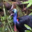
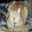
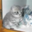
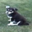
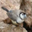
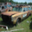
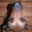
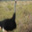
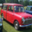
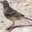
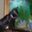
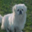
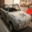
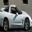
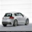
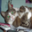
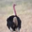
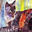
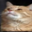
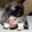
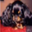
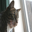
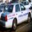
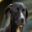
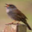
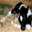
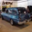
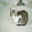
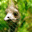
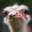
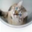
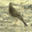
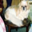
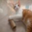
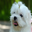
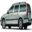
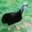
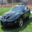
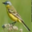
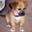
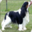
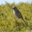
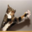
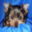
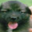
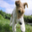
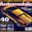
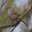
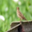
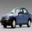
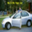
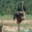
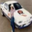
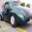
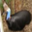
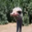
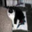
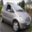
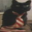
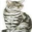
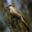
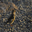
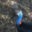
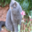
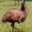
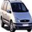
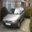
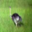
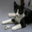
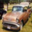
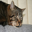
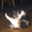
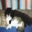
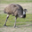
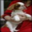
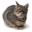
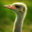
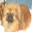
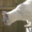
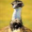
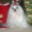
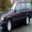
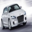
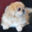
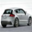
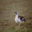
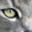
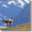
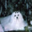
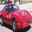
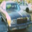
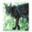
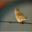
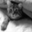
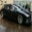
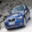
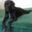
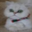
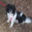
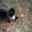

In [3]:
image_data['image'].explore()

# Compute deep features from our images

In [4]:
#deep_learning_model = turicreate.load_model('imagenet_model_iter45')
#image_data['deep_features'] = deep_learning_model.extract_features(image_data)

In [5]:
image_data

Columns:
	id	int
	image	Image
	label	str
	deep_features	array
	image_array	array

Rows: 2005

Data:
+-----+----------------------+------------+-------------------------------+
|  id |        image         |   label    |         deep_features         |
+-----+----------------------+------------+-------------------------------+
|  24 | Height: 32 Width: 32 |    bird    | [0.24287176132202148, 1.09... |
|  33 | Height: 32 Width: 32 |    cat     | [0.5250879526138306, 0.0, ... |
|  36 | Height: 32 Width: 32 |    cat     | [0.5660159587860107, 0.0, ... |
|  70 | Height: 32 Width: 32 |    dog     | [1.129795789718628, 0.0, 0... |
|  90 | Height: 32 Width: 32 |    bird    | [1.7178692817687988, 0.0, ... |
|  97 | Height: 32 Width: 32 | automobile | [1.5781855583190918, 0.0, ... |
| 107 | Height: 32 Width: 32 |    dog     | [0.0, 0.0, 0.2206778526306... |
| 121 | Height: 32 Width: 32 |    bird    | [0.0, 0.23753464221954346,... |
| 136 | Height: 32 Width: 32 | automobile | [0.0, 0.0, 0.0, 0.0, 0.0, ... |
| 138 | Height: 32 Width: 32 |    bird    | [0.6589357256889343, 0.0, ... |
+-----+----------------------+------------+-------------------------------+
+-------------------------------+
|          image_array          |
+-------------------------------+
| [73.0, 77.0, 58.0, 71.0, 6... |
| [7.0, 5.0, 8.0, 7.0, 5.0, ... |
| [169.0, 122.0, 65.0, 131.0... |
| [154.0, 179.0, 152.0, 159.... |
| [216.0, 195.0, 180.0, 201.... |
| [33.0, 44.0, 27.0, 29.0, 4... |
| [97.0, 51.0, 31.0, 104.0, ... |
| [93.0, 96.0, 88.0, 102.0, ... |
| [35.0, 59.0, 53.0, 36.0, 5... |
| [205.0, 193.0, 195.0, 200.... |
+-------------------------------+
[2005 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

# Create a nearest neighbors model to retrieve images from deep features

In [6]:
knn_model = turicreate.nearest_neighbors.create(image_data,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

# Use image retrieval model with deep features to find similar images

In [7]:
cat = image_data[18:19]


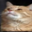

In [8]:
cat['image'].explore()

In [9]:
knn_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 4.139ms      |

| Done         |         | 100         | 53.246ms     |

+--------------+---------+-------------+--------------+

Columns:
	query_label	int
	reference_label	int
	distance	float
	rank	int

Rows: 5

Data:
+-------------+-----------------+--------------------+------+
| query_label | reference_label |      distance      | rank |
+-------------+-----------------+--------------------+------+
|      0      |       384       |        0.0         |  1   |
|      0      |       6910      | 36.94031379506751  |  2   |
|      0      |      39777      | 38.46348889747021  |  3   |
|      0      |      36870      | 39.75596231189652  |  4   |
|      0      |      41734      | 39.786601414815024 |  5   |
+-------------+-----------------+--------------------+------+
[5 rows x 4 columns]

In [10]:
def get_images_from_ids(query_result):
    return image_data.filter_by(query_result['reference_label'],'id')

In [11]:
cat_neighbors = get_images_from_ids(knn_model.query(cat))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 5.558ms      |

| Done         |         | 100         | 52.294ms     |

+--------------+---------+-------------+--------------+


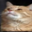
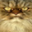
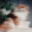
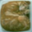
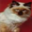

In [12]:
cat_neighbors['image'].explore()

# Find images similar to a car

In [13]:
car = image_data[8:9]


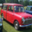

In [14]:
car['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 4.737ms      |

| Done         |         | 100         | 54.987ms     |

+--------------+---------+-------------+--------------+


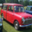
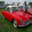
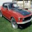
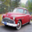
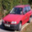

In [15]:
get_images_from_ids(knn_model.query(car))['image'].explore()

# Create a lambda function to find and show nearest neighbors to an image

In [16]:
show_neighbors = lambda i: get_images_from_ids(knn_model.query(image_data[i:i+1]))['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 4.046ms      |

| Done         |         | 100         | 54.6ms       |

+--------------+---------+-------------+--------------+


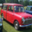
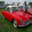
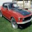
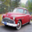
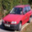

In [17]:
show_neighbors(8)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 3.672ms      |

| Done         |         | 100         | 52.368ms     |

+--------------+---------+-------------+--------------+


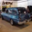
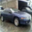
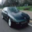
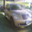
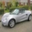

In [18]:
show_neighbors(26)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 5.109ms      |

| Done         |         | 100         | 53.668ms     |

+--------------+---------+-------------+--------------+


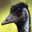
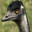
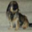
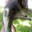
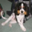

In [19]:
show_neighbors(500)